In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from collections import defaultdict

### Declare

In [2]:
property2eval = defaultdict(dict) # "all" or "degree" ... -> "acc" or "precision_micro" ... -> "model name" 

## Evaluation

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

def get_clf_eval(y_test, pred, avg='micro'):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average=avg)
    recall = recall_score(y_test, pred, average=avg)
    f1 = f1_score(y_test, pred, average=avg)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy:{}, Precision:{}, Recall:{}, F1:{}'.format(accuracy, precision, recall, f1))
    
    return accuracy, precision, recall, f1

In [4]:
import numpy as np

def fig_confusion_mat(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    precision_mic = precision_score(y_test, pred, average='micro')
    precision_mac = precision_score(y_test, pred, average='macro')
    recall_mic = recall_score(y_test, pred, average='micro')
    recall_mac = recall_score(y_test, pred, average='macro')
    f1_mic = f1_score(y_test, pred, average='micro')
    f1_mac = f1_score(y_test, pred, average='macro')
    
    # recall
    rec_bar = []
    for i in range(confusion.shape[0]):
        row_sum = np.sum(confusion[i])
        ans = confusion[i,i]
        rec_bar.append(ans / row_sum)
    plt.figure(dpi=100, figsize=(4,3))
    plt.bar(range(len(rec_bar)), rec_bar)
    plt.title("Recall - %.2f / %.2f" % (recall_mic, recall_mac))
    plt.xlabel("Class")
    ax = plt.gca()
    ax.set_ylim([0, 1])
    plt.show()
    plt.close()
    
    # precision
    prec_bar = []
    for i in range(confusion.shape[0]):
        row_sum = np.sum(confusion[i])
        ans = confusion[i,i]
        prec_bar.append(ans / row_sum)
    plt.figure(dpi=100, figsize=(4,3))
    plt.bar(range(len(prec_bar)), prec_bar)
    plt.title("Precision - %.2f / %.2f" % (precision_mic, precision_mac))
    plt.xlabel("Class")
    ax = plt.gca()
    ax.set_ylim([0, 1])
    plt.show()
    plt.close()
    
    # f1-score
    f1_bar = []
    for i in range(len(rec_bar)):
        f1_bar.append(2 * ( (prec_bar[i] * rec_bar[i]) / (prec_bar[i] + rec_bar[i]) ))
    plt.figure(dpi=100, figsize=(4,3))
    plt.bar(range(len(f1_bar)), f1_bar)
    plt.title("F1 Score - %.2f / %.2f" % (f1_mic, f1_mac))
    plt.xlabel("Class")
    ax = plt.gca()
    ax.set_ylim([0, 1])
    plt.show()
    plt.close()
    

In [5]:
def update_result(property_name, result_dict):
    for k,v in result_dict.items():
        property2eval[property_name][k] = v

### Data

In [111]:
node_target_col = ["pagerank"] # erase
hedge_target_col = ["all"]

In [112]:
base = ['node index', 'paper code']
degree = ['degree_0', 'degree_1', 'degree_2', 'degree_3', 'degree_4', 'degree_5', 'degree_6', 'degree_7']
eigenvec = [ 'eigenvec_0', 'eigenvec_1', 'eigenvec_2', 'eigenvec_3', 'eigenvec_4', 
           'eigenvec_5', 'eigenvec_6', 'eigenvec_7', 'eigenvec_8', 'eigenvec_9',
           'eigenvec_10', 'eigenvec_11', 'eigenvec_12', 'eigenvec_13',
           'eigenvec_14', 'eigenvec_15', 'eigenvec_16', 'eigenvec_17',
           'eigenvec_18', 'eigenvec_19', 'eigenvec_20', 'eigenvec_21',
           'eigenvec_22', 'eigenvec_23']
kcore = ['kcore_0', 'kcore_1', 'kcore_2', 'kcore_3', 'kcore_4', 'kcore_5', 'kcore_6', 'kcore_7', 'kcore_8',
           'kcore_9', 'kcore_10', 'kcore_11', 'kcore_12', 'kcore_13', 'kcore_14']
pagerank = ['pagerank_0', 'pagerank_1', 'pagerank_2', 'pagerank_3', 'pagerank_4', 'pagerank_5', 'pagerank_6', 'pagerank_7']
deg_avg = ['deg_avg_0', 'deg_avg_1', 'deg_avg_2', 'deg_avg_3', 'deg_avg_4', 'deg_avg_5', 'deg_avg_6', 'deg_avg_7']
deg_max = ['deg_max_0', 'deg_max_1', 'deg_max_2', 'deg_max_3', 'deg_max_4', 'deg_max_5', 'deg_max_6']
deg_min = ['deg_min_0', 'deg_min_1', 'deg_min_2', 'deg_min_3', 'deg_min_4', 'deg_min_5', 'deg_min_6', 'deg_min_7']
pos = ['pos']

usecols = base
if "degree" not in node_target_col or "all" in node_target_col:
    usecols += degree
if "eigenvec" not in node_target_col or "all" in node_target_col:
    usecols += eigenvec
if "kcore" not in node_target_col or "all" in node_target_col:
    usecols += kcore
if "pagerank" not in node_target_col or "all" in node_target_col:
    usecols += pagerank
    
if "deg_avg" in hedge_target_col or "all" in hedge_target_col:
    usecols += deg_avg
if "deg_max" in hedge_target_col or "all" in hedge_target_col:
    usecols += deg_max
if "deg_min" in hedge_target_col or "all" in hedge_target_col:
    usecols += deg_min
usecols += pos

In [113]:
property_name = "-".join(node_target_col) + "-" + "-".join(hedge_target_col)
print(property_name)
print(usecols)
print(len(usecols))

pagerank-all
['node index', 'paper code', 'degree_0', 'degree_1', 'degree_2', 'degree_3', 'degree_4', 'degree_5', 'degree_6', 'degree_7', 'eigenvec_0', 'eigenvec_1', 'eigenvec_2', 'eigenvec_3', 'eigenvec_4', 'eigenvec_5', 'eigenvec_6', 'eigenvec_7', 'eigenvec_8', 'eigenvec_9', 'eigenvec_10', 'eigenvec_11', 'eigenvec_12', 'eigenvec_13', 'eigenvec_14', 'eigenvec_15', 'eigenvec_16', 'eigenvec_17', 'eigenvec_18', 'eigenvec_19', 'eigenvec_20', 'eigenvec_21', 'eigenvec_22', 'eigenvec_23', 'kcore_0', 'kcore_1', 'kcore_2', 'kcore_3', 'kcore_4', 'kcore_5', 'kcore_6', 'kcore_7', 'kcore_8', 'kcore_9', 'kcore_10', 'kcore_11', 'kcore_12', 'kcore_13', 'kcore_14', 'deg_avg_0', 'deg_avg_1', 'deg_avg_2', 'deg_avg_3', 'deg_avg_4', 'deg_avg_5', 'deg_avg_6', 'deg_avg_7', 'deg_max_0', 'deg_max_1', 'deg_max_2', 'deg_max_3', 'deg_max_4', 'deg_max_5', 'deg_max_6', 'deg_min_0', 'deg_min_1', 'deg_min_2', 'deg_min_3', 'deg_min_4', 'deg_min_5', 'deg_min_6', 'deg_min_7', 'pos']
73


In [114]:
data = pd.read_csv("dataset/DBLP2/whole_data_onehot.txt", usecols=usecols)

In [115]:
data.head()

,node index,paper code,degree_0,degree_1,degree_2,degree_3,degree_4,degree_5,degree_6,degree_7,...,deg_max_6,deg_min_0,deg_min_1,deg_min_2,deg_min_3,deg_min_4,deg_min_5,deg_min_6,deg_min_7,pos
0,23,conf/aaai/0003MGF14,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,24,conf/aaai/0003MGF14,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,25,conf/aaai/0003MGF14,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,26,conf/aaai/0003MGF14,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,2
4,325,conf/aaai/AlonFMT13,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [116]:
data.columns

Index(['node index', 'paper code', 'degree_0', 'degree_1', 'degree_2',
       'degree_3', 'degree_4', 'degree_5', 'degree_6', 'degree_7',
       'eigenvec_0', 'eigenvec_1', 'eigenvec_2', 'eigenvec_3', 'eigenvec_4',
       'eigenvec_5', 'eigenvec_6', 'eigenvec_7', 'eigenvec_8', 'eigenvec_9',
       'eigenvec_10', 'eigenvec_11', 'eigenvec_12', 'eigenvec_13',
       'eigenvec_14', 'eigenvec_15', 'eigenvec_16', 'eigenvec_17',
       'eigenvec_18', 'eigenvec_19', 'eigenvec_20', 'eigenvec_21',
       'eigenvec_22', 'eigenvec_23', 'kcore_0', 'kcore_1', 'kcore_2',
       'kcore_3', 'kcore_4', 'kcore_5', 'kcore_6', 'kcore_7', 'kcore_8',
       'kcore_9', 'kcore_10', 'kcore_11', 'kcore_12', 'kcore_13', 'kcore_14',
       'deg_avg_0', 'deg_avg_1', 'deg_avg_2', 'deg_avg_3', 'deg_avg_4',
       'deg_avg_5', 'deg_avg_6', 'deg_avg_7', 'deg_max_0', 'deg_max_1',
       'deg_max_2', 'deg_max_3', 'deg_max_4', 'deg_max_5', 'deg_max_6',
       'deg_min_0', 'deg_min_1', 'deg_min_2', 'deg_min_3', 'deg_min_4'

In [117]:
X = data.iloc[:,2:-1].values
Y = data.iloc[:,-1].values
print(X[:5,:])
print(Y[:5])

[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]]
[0 1 1 2 0]


In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 21)

## Model

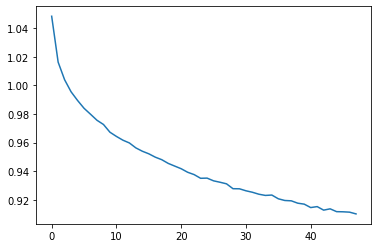

In [119]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(64,32,16), max_iter=300, activation='relu', solver='adam', learning_rate_init=0.001, random_state=1, early_stopping=True, n_iter_no_change=20)

#Fitting the training data to the network
classifier.fit(X_train, Y_train)
plt.plot(classifier.loss_curve_)
plt.show()
plt.close()

y_pred = classifier.predict(X_test)

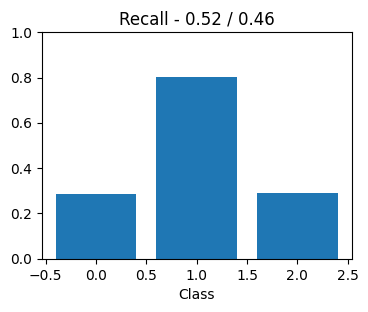

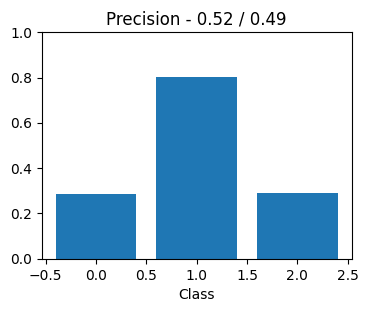

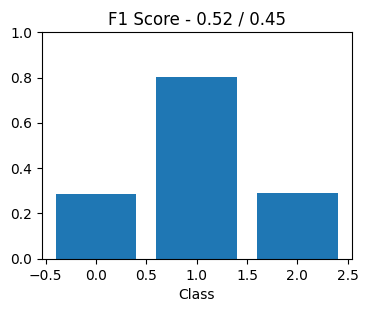

In [120]:
fig_confusion_mat(Y_test, y_pred)

In [121]:
accuracy, precision_micro, recall_micro, f1_micro = get_clf_eval(Y_test, y_pred, avg='micro')

Confusion Matrix
[[ 567 1111  312]
 [ 275 2565  358]
 [ 345 1070  579]]
Accuracy:0.5167084377610693, Precision:0.5167084377610693, Recall:0.5167084377610693, F1:0.5167084377610693


In [122]:
accuracy, precision_macro, recall_macro, f1_macro = get_clf_eval(Y_test, y_pred, avg='macro')

Confusion Matrix
[[ 567 1111  312]
 [ 275 2565  358]
 [ 345 1070  579]]
Accuracy:0.5167084377610693, Precision:0.49390026241099666, Recall:0.4591198421080886, F1:0.4532625611409386


In [123]:
result_dict = { "accuracy" : accuracy,
               "precision_micro" : precision_micro,
               "precision_macro" : precision_macro,
               "recall_micro" : recall_micro,
               "recall_macro" : recall_macro,
               "f1_micro" : f1_micro,
               "f1_macro" : f1_macro    
}

In [124]:
update_result(property_name, result_dict)

In [125]:
print(property2eval)

defaultdict(<class 'dict'>, {'all-all': {'accuracy': 0.5292397660818714, 'precision_micro': 0.5292397660818714, 'precision_macro': 0.5109697167147447, 'recall_micro': 0.5292397660818714, 'recall_macro': 0.48013475794756877, 'f1_micro': 0.5292397660818714, 'f1_macro': 0.47906367186348064}, 'all-deg_avg': {'accuracy': 0.4997215260373155, 'precision_micro': 0.4997215260373155, 'precision_macro': 0.48127309069019714, 'recall_micro': 0.4997215260373155, 'recall_macro': 0.45148863760513147, 'f1_micro': 0.4997215260373155, 'f1_macro': 0.4488802669659631}, 'all-deg_max': {'accuracy': 0.5175438596491229, 'precision_micro': 0.5175438596491229, 'precision_macro': 0.5033304156229507, 'recall_micro': 0.5175438596491229, 'recall_macro': 0.46813928995806164, 'f1_micro': 0.5175438596491229, 'f1_macro': 0.4676411145964428}, 'all-deg_min': {'accuracy': 0.5077972709551657, 'precision_micro': 0.5077972709551657, 'precision_macro': 0.4868051762357288, 'recall_micro': 0.5077972709551657, 'recall_macro': 0.4

### Save Results

In [128]:
xs = list(property2eval["all-all"].keys())

for prop in property2eval.keys():
    with open("nongraph_results/onehot_mlp_" + prop + ".txt", "w") as f:
        for x in xs:
            f.write(x + "\t" + str(property2eval[prop][x]) + "\n")

### Analyze

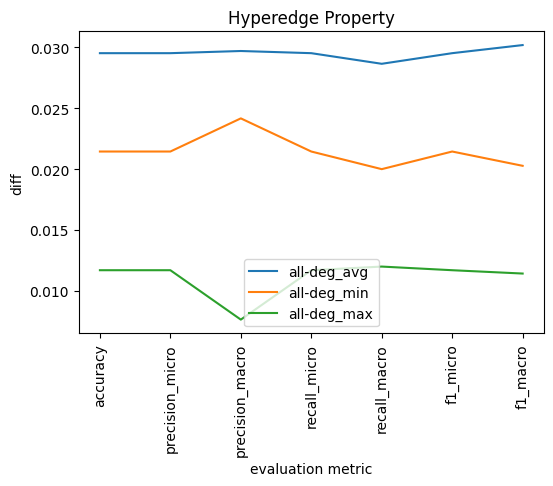

In [129]:
plt.figure(dpi=100, figsize=(6,4))
xs = list(property2eval["all-all"].keys())
all_ys = []
for x in xs:
    all_ys.append(property2eval["all-all"][x])

for prop in ["all-deg_avg", "all-deg_min", "all-deg_max"]:
    if prop == "all-all":
        continue
    ys = []
    for i, x in enumerate(xs):
        y = all_ys[i] - property2eval[prop][x]
        ys.append(y)
    plt.plot(xs, ys, label=prop)
plt.xlabel("evaluation metric")
plt.ylabel("diff")
plt.legend()
plt.title("Hyperedge Property")
plt.xticks(rotation=90)
plt.show()
plt.close()

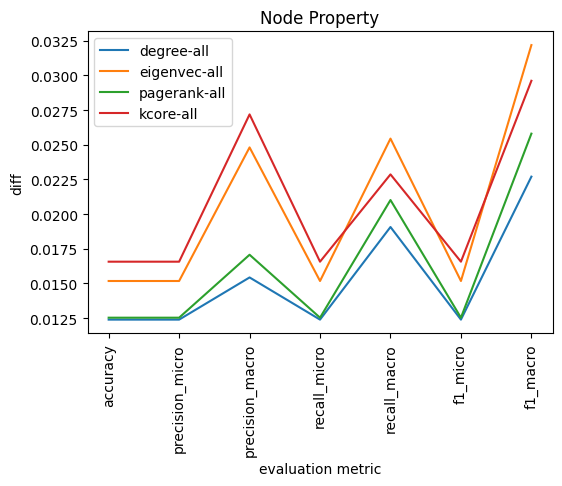

In [130]:
plt.figure(dpi=100, figsize=(6,4))
xs = list(property2eval["all-all"].keys())
all_ys = []
for x in xs:
    all_ys.append(property2eval["all-all"][x])

for prop in ["degree-all", "eigenvec-all", "pagerank-all", "kcore-all"]:
    if prop == "all-all":
        continue
    ys = []
    for i, x in enumerate(xs):
        y = all_ys[i] - property2eval[prop][x]
        ys.append(y)
    plt.plot(xs, ys, label=prop)
plt.xlabel("evaluation metric")
plt.ylabel("diff")
plt.legend()
plt.title("Node Property")
plt.xticks(rotation=90)
plt.show()
plt.close()